### 0. Segmenting w/ AI Model

- SAM Module
- https://segment-anything.com/demo#
- Or, 인공지능 학습방법

### 1. Interpreting Assignment 4

- Lung Cancer 찾기
- Lung Cancer에서 Lung Nodule을 찾기
- 영상처리 지식이 필수적
- 또한, 공학적으로 문제를 어떻게 풀지 설계해야지만, 완벽하게 automatic한 방법론 구안가능
- 난이도 3.5/5

### 2. Concept of Opening/Closing

- Erosion (침식) 연산: 이미지를 깍아내는 연산
  - 커널 (Kernel)을 사용하여 matching 연산을 수행
  - 기능
    - 큰 물체의 주변을 깍아내는 기능
    - 작은 물체는 없애버림 -> 노이즈 제거
    - 떨어져있는 물체가 겹쳐보일 때, 떼어내는 용도

- Dilate (팽칭) 연산: 물체의 주변을 확장하는 연산
  - 커널 (Kernel)을 사용하여 matching 연산을 수행

- Opening (열림) 연산: Erosion -> Dilatation 수행
  - 주변보다 밝은 노이즈 제거 -> 돌출된 모양을 제거

- Closing (닫힘) 연산: Dilatation -> Erosion 수행
  - 끊어져있는 개체를 연결하거나, 구멍을 메우는 데 효과적

- Gradient (기울기/변화량) 연산: Dilatation - Erosion 수행
  - 경계 픽셀 추축

- Top hat 연산: 원본 - opening
  - 값이 크게 튀는 밝은 영역을 강조

- Balck hat 연산: Closing - Origin
  - 어두운 부분을 강조

- 예시 이미지. https://blog.naver.com/aik1919/140106419436

### 3. Practicing Code snippet

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

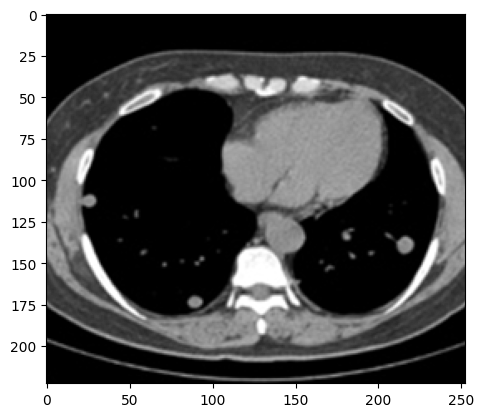

In [2]:
# Load the image
image = cv2.imread('./Lab Assignment 4-input.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

#### 3-1. Performing w/ Grayscale Image

- Erosion (침식) 연산: 이미지를 깍아내는 연산
- Dilate (팽칭) 연산: 물체의 주변을 확장하는 연산
- Opening (열림) 연산: Erosion -> Dilatation 수행, 주변보다 밝은 노이즈 제거
- Closing (닫힘) 연산: Dilatation -> Erosion 수행, 끊어져있는 개체를 연결하거나, 구멍을 메우는 데 효과적
- Gradient (기울기/변화량) 연산: Dilatation - Erosion 수행, 경계 픽셀 추축
- Top hat 연산: 원본 - Opening연산, 값이 크게 튀는 밝은 영역을 강조
- Balck hat 연산: Closing연산 - 원본, 어두운 부분을 강조

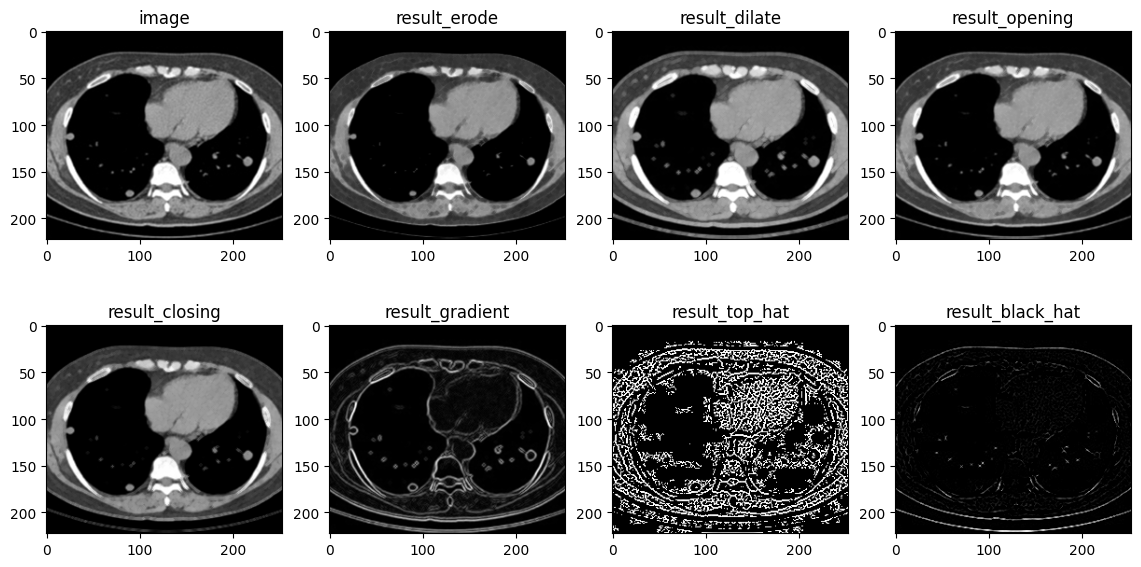

In [7]:
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
    ]).astype(np.uint8)

result_erode  = cv2.erode(image, kernel, iterations=1)
result_dilate = cv2.dilate(image, kernel, iterations=1)

result_opening = cv2.erode(result_dilate, kernel, iterations=1)
result_closing = cv2.dilate(result_erode, kernel, iterations=1)

result_gradient = result_dilate - result_erode
result_top_hat = image - result_opening
result_black_hat = image - result_closing

# fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# ax[0].set_title('image')
# ax[0].imshow(image, cmap='gray')

# ax[1].set_title('result_dilate')
# ax[1].imshow(result_dilate, cmap='gray')

fig, ax = plt.subplots(2, 4, figsize=(14, 7))
ax[0][0].set_title('image')
ax[0][0].imshow(image, cmap='gray')

ax[0][1].set_title('result_erode')
ax[0][1].imshow(result_erode, cmap='gray')

ax[0][2].set_title('result_dilate')
ax[0][2].imshow(result_dilate, cmap='gray')

ax[0][3].set_title('result_opening')
ax[0][3].imshow(result_opening, cmap='gray')

ax[1][0].set_title('result_closing')
ax[1][0].imshow(result_closing, cmap='gray')

ax[1][1].set_title('result_gradient')
ax[1][1].imshow(result_gradient, cmap='gray')

ax[1][2].set_title('result_top_hat')
ax[1][2].imshow(result_top_hat, cmap='gray')

ax[1][3].set_title('result_black_hat')
ax[1][3].imshow(result_black_hat, cmap='gray')

#### 3-2. Performing w/ binary Image

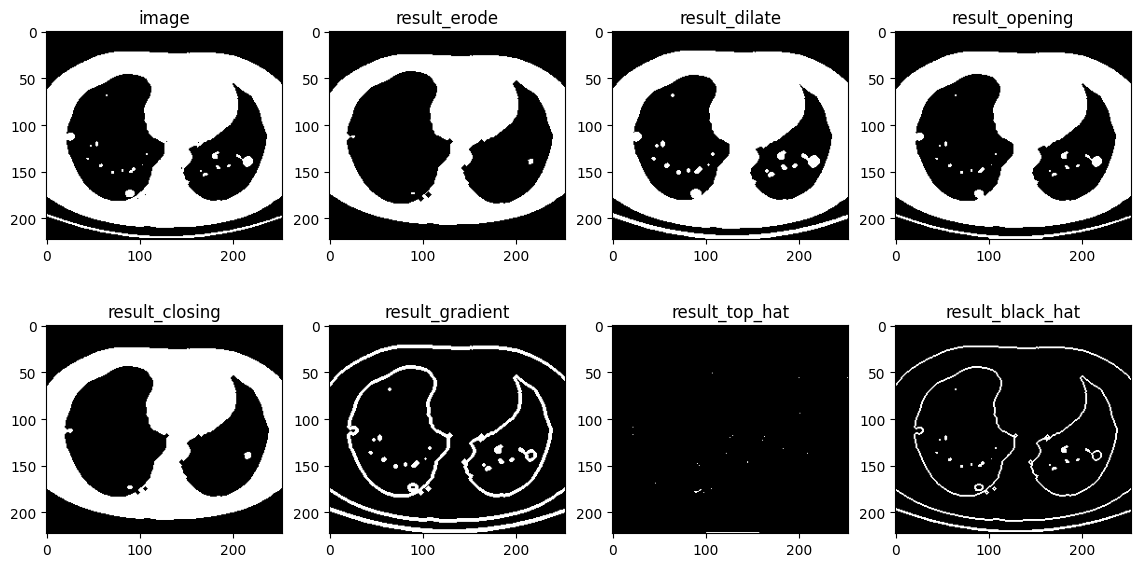

In [12]:
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
    ]).astype(np.uint8)

binary = (image > 30).astype(np.uint8)

result_erode  = cv2.erode(binary, kernel, iterations=3)
result_dilate = cv2.dilate(binary, kernel, iterations=1)
result_opening = cv2.erode(result_dilate, kernel, iterations=1)
result_closing = cv2.dilate(result_erode, kernel, iterations=1)
result_gradient = result_dilate - result_erode
result_top_hat = binary - result_opening
result_black_hat = binary - result_closing

# fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# ax[0].set_title('image')
# ax[0].imshow(image, cmap='gray')

fig, ax = plt.subplots(2, 4, figsize=(14, 7))
ax[0][0].set_title('image')
ax[0][0].imshow(binary, cmap='gray')

ax[0][1].set_title('result_erode')
ax[0][1].imshow(result_erode, cmap='gray')

ax[0][2].set_title('result_dilate')
ax[0][2].imshow(result_dilate, cmap='gray')

ax[0][3].set_title('result_opening')
ax[0][3].imshow(result_opening, cmap='gray')

ax[1][0].set_title('result_closing')
ax[1][0].imshow(result_closing, cmap='gray')

ax[1][1].set_title('result_gradient')
ax[1][1].imshow(result_gradient, cmap='gray')

ax[1][2].set_title('result_top_hat')
ax[1][2].imshow(result_top_hat, cmap='gray')

ax[1][3].set_title('result_black_hat')
ax[1][3].imshow(result_black_hat, cmap='gray')

#### ⭐ 검출 방법을 고민해보세요!
- 본 문제가 왜 어렵냐면 -> 방법론을 알고있어도 어떻게 목표 output 처럼 뽑아낼 것인지 '설계'하기가 힘들기때문

#### 3-3. Making better result w/ only processing method

In [ ]:
def draw_cross(img, cx, cy):
  cv2.line(img, (cx-10, cy), (cx+10, cy), (255, 255, 0), 1)   # Draw a horizontal line
  cv2.line(img, (cx, cy-10), (cx, cy+10), (255, 255, 0), 1)    # Draw a vertical line

def find_centroid(contour):
    # Calculate moments for the contour
    M = cv2.moments(contour)

    # Ensure that the moment is not zero to avoid division by zero error
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    return (cX, cY)

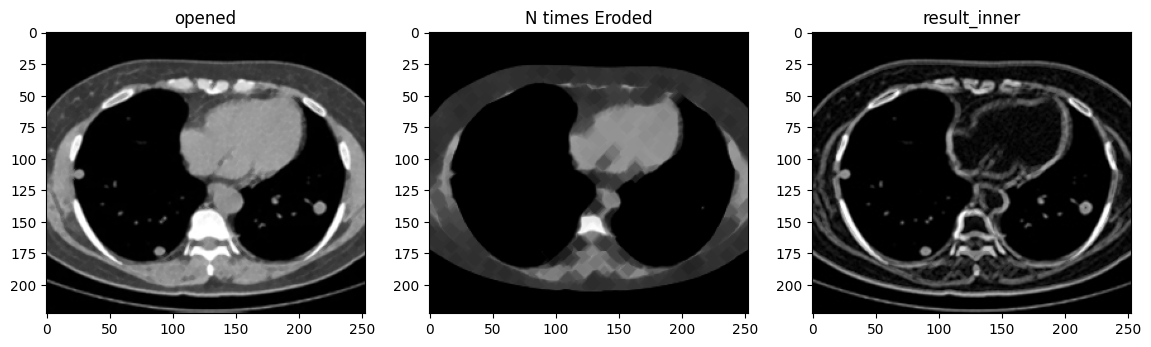

In [ ]:
# Define the kernel
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
    ]).astype(np.uint8)

result_erode = cv2.erode(image, kernel, iterations=5)
result_inner = image - result_erode

fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].set_title('opened')
ax[0].imshow(opened, cmap='gray')

ax[1].set_title('N times Eroded')
ax[1].imshow(result_erode, cmap='gray')

ax[2].set_title('result_inner')
ax[2].imshow(result_inner, cmap='gray')


#### 3-4. Making the best result

In [13]:
from scipy import ndimage as ndi
from skimage.filters import roberts, sobel

from skimage.segmentation import clear_border
from skimage.morphology import disk, binary_erosion, binary_closing

In [14]:
def find_centroid(contour):
    M = cv2.moments(contour)

    # Ensure that the moment is not zero to avoid division by zero error
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    return (cX, cY)

def draw_cross(img, cx, cy):
  cv2.line(img, (cx-10, cy), (cx+10, cy), (255, 0, 0), 1)   # Draw a horizontal line
  cv2.line(img, (cx, cy-10), (cx, cy+10), (255, 0, 0), 1)    # Draw a vertical line    

#### 3-4-1. Edge까지 같이 탐지하는 실패버전

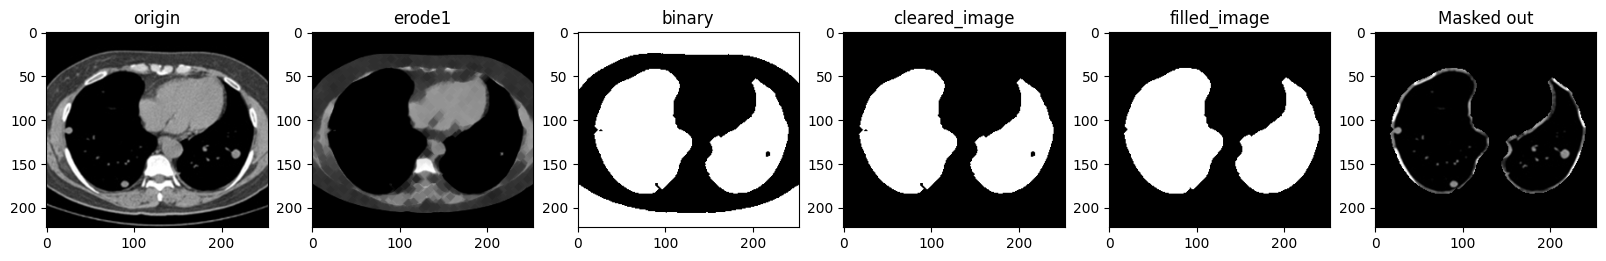

In [16]:
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
    ]).astype(np.uint8)

erode1 = cv2.erode(image, kernel, iterations=4)

binary_image = erode1.copy()
binary_image = binary_image < 3
cleared_image = clear_border(binary_image)

edges = roberts(cleared_image)
filled_image = ndi.binary_fill_holes(edges)

image2 = image.copy()
valid_values = (filled_image == 0)
image2[valid_values] = 0 # minimum value

fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].set_title('origin')
ax[0].imshow(image, cmap='gray')

ax[1].set_title('erode1')
ax[1].imshow(erode1, cmap='gray')

ax[2].set_title('binary')
ax[2].imshow(binary_image, cmap='gray')

ax[3].set_title('cleared_image')
ax[3].imshow(cleared_image, cmap='gray')

# ax[4].set_title('dilated_image')
# ax[4].imshow(dilated_image, cmap='gray')

ax[4].set_title('filled_image')
ax[4].imshow(filled_image, cmap='gray')

ax[5].set_title('Masked out')
ax[5].imshow(image2, cmap='gray')

#### 3-4-2. Edge없이 깔끔하게 추출하는 성공버전

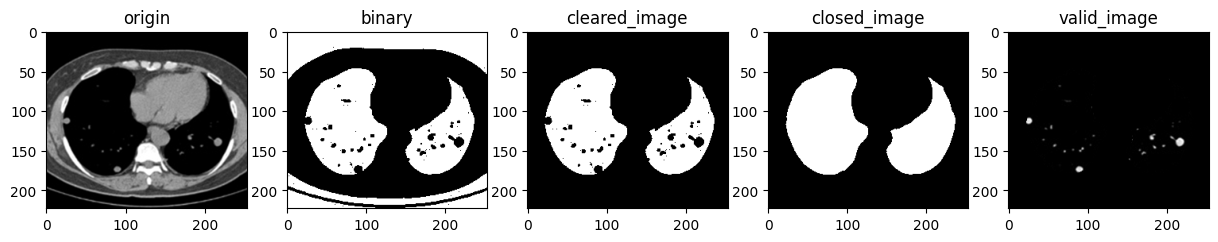

In [31]:
# kernel = np.array([
#     [0, 1, 0],
#     [1, 1, 1],
#     [0, 1, 0],
#     ]).astype(np.uint8)

image = cv2.imread('./Lab Assignment 4-input.png', cv2.IMREAD_GRAYSCALE)

binary_image = image < 3
cleared_image = clear_border(binary_image) # Binary 이미지에서 내부에 존재하는 영역을 제외하고 경계선 바깥을 모두 0으로 만들기

selem = disk(10)
closed_image = binary_closing(cleared_image, selem)

valid_image = image.copy()
valid_values = (closed_image == 0)
valid_image[valid_values] = 0

# If using Edge Filiing
# edges = roberts(closed_image)               # Roberts Edge Detection
# filled_image = ndi.binary_fill_holes(edges)

# valid_image = image.copy()
# valid_values = (filled_image == 0)
# valid_image[valid_values] = 0

valid_image = image.copy()
valid_values = (closed_image == 0)
valid_image[valid_values] = 0

fig, ax = plt.subplots(1, 5, figsize=(15, 5))
ax[0].set_title('origin')
ax[0].imshow(image, cmap='gray')

ax[1].set_title('binary')
ax[1].imshow(binary_image, cmap='gray')

ax[2].set_title('cleared_image')
ax[2].imshow(cleared_image, cmap='gray')

ax[3].set_title('closed_image')
ax[3].imshow(closed_image, cmap='gray')

# ax[4].set_title('filled_image')
# ax[4].imshow(filled_image, cmap='gray')

ax[4].set_title('valid_image')
ax[4].imshow(valid_image, cmap='gray')

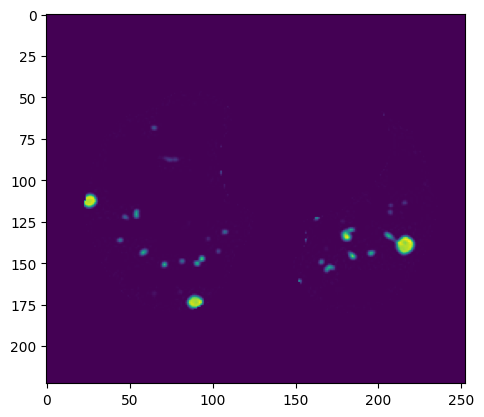

In [32]:
plt.imshow(valid_image)

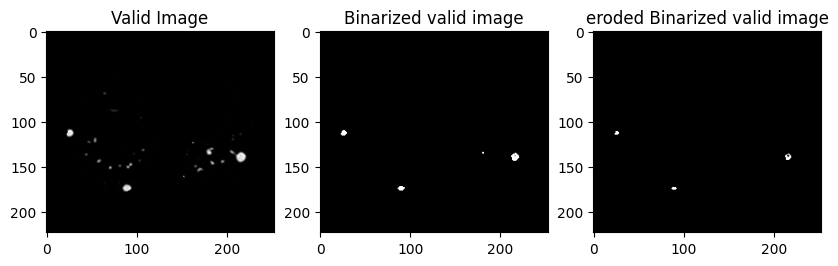

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].set_title('Valid Image')
ax[0].imshow(valid_image, cmap='gray')

ax[1].set_title('Binarized valid image')
ax[1].imshow(valid_image>130, cmap='gray')

ax[2].set_title('eroded Binarized valid image')
ax[2].imshow(cv2.erode((valid_image>130).astype(np.uint8), kernel), cmap='gray')

1. 원본이미지 -> [이진화] -> binary image

2. binary image -> [cleared image, 경계면 추출] -> cleared binary image
3. cleared binary image -> [열림연산 Closing, 동그란 커널] -> Closed Binary Image
4. 원본이미지 (Grayscale) * Closed Binary Image -> [마스킹 추출] -> 원본 이미지인데 폐 내부만 남아있는 이미지 Masking Out Image (Grayscale)

5. Masking Out Image -> [이진화] -> Masked Binary Image
6. Masked Binary Image -> [침식연산] -> 노이즈 제거된 폐 종양 이미지

7. 노이즈 제거된 폐 종양 이미지 -> [Contour 연산을 진행] -> 각 폐 종양의 Contours
8. 각 폐 종양의 contour -> [find Centroid] -> 🔥각 폐 종양의 center x, center y🔥
9. 🔥각 폐 종양의 center x, center y🔥 -> 원본이미지 -> 화살표로 시각화를 진행

```
def draw_cross(img, cx, cy):
  cv2.line(img, (cx-10, cy), (cx+10, cy), (255, 0, 0), 1)   # Draw a horizontal line
  cv2.line(img, (cx, cy-10), (cx, cy+10), (255, 0, 0), 1)   # Draw a vertical line    
```

Region of Interest -> RoI -> 관심영역

3


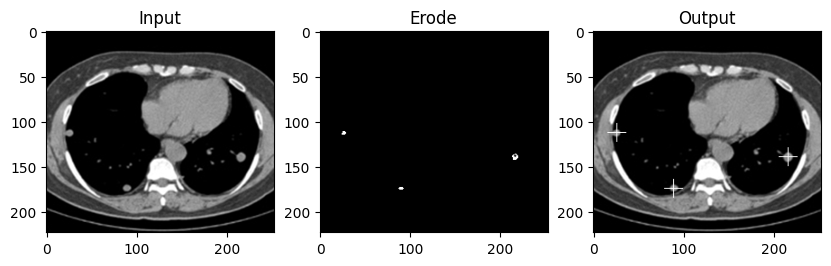

In [35]:
binarized_valid_image = valid_image > 130
erode = cv2.erode(binarized_valid_image.astype(np.uint8), kernel, iterations=1)


contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

vis_image = image.copy()
valid_coords = []
for each_contour in contours:
  coords = find_centroid(each_contour)
  if sum(coords) != 0:
    valid_coords.append(coords)
    draw_cross(vis_image, coords[0], coords[1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].set_title('Input')
# ax[0].imshow(image, cmap='gray')

ax[0].set_title('Erode')
ax[0].imshow(erode, cmap='gray')

ax[1].set_title('Output')
ax[1].imshow(vis_image, cmap='gray')